In [81]:
import os
from os.path import isfile

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import pickle

In [170]:
def split_image_col(image):
    image = np.array(image)
    image_split = []
    temp = []
    for i in range(0, image.shape[1]):
        if image[:, i].mean() == 255:
            if i-1>0 and image[:, i-1].mean() != 255:
                image_split.append(np.transpose(np.array(temp)))
                temp = []
        else:
            temp.append(image[:, i])
    if len(temp) > 0:
        image_split.append(temp)
    return image_split

def split_image_row(image):
    image = image.convert('L')
    image = np.array(image)
    image = np.where(image > 0, 255, 0)
    image_split = []
    temp = []
    for i in range(0, image.shape[0]):
        if image[i].mean() == 255:
            if i-1>0 and image[i-1].mean() != 255:
                image_split.append(Image.fromarray(np.array(temp, dtype='uint8')))
                temp = []
        else:
            temp.append(image[i, :])
    if len(temp) > 0:
        image_split.append(Image.fromarray(np.array(temp, dtype='uint8')))
    return image_split

def split_image(image):
    rows = split_image_row(image)
    images = []
    for row in rows:
        cols = split_image_col(row)
        for col in cols:
            images.append(rescale_image(col))
    return images

def rescale_image(image):
    non_empty_rows = np.where(np.mean(image, axis=1) < 255)[0]
    image = image[non_empty_rows]

    non_empty_columns = np.where(np.mean(image, axis=0) < 255)[0]
    image = image[:, non_empty_columns]

    image = np.uint8(image)
    image = Image.fromarray(image)

    resized_image = image.resize((28, 28), resample=Image.LANCZOS)
    return np.where(np.array(resized_image) > 50, 255, 0)

def convert_1d(array2d):
    columns = [f'0.'+str(i) for i in range(1,785)]
    array = [np.ravel(array2d)]
    return pd.DataFrame(array, columns=columns)


In [176]:
def load(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

model = load('/Users/mendrika/PycharmProjects/equation/model.pickle')

7
Image de 1


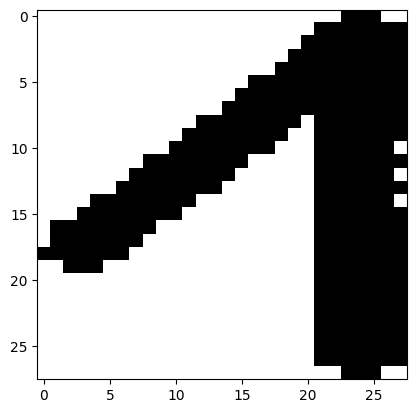

Image de w


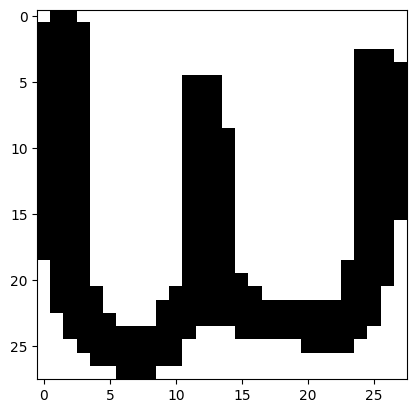

Image de -


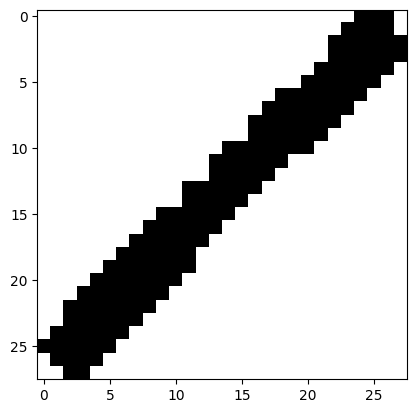

Image de *


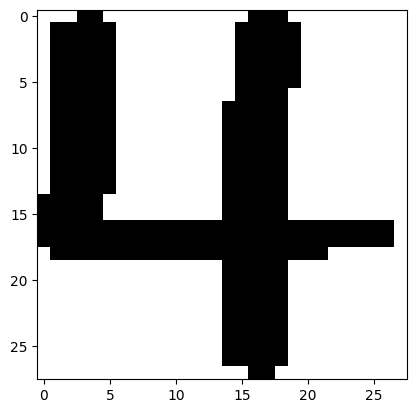

Image de w


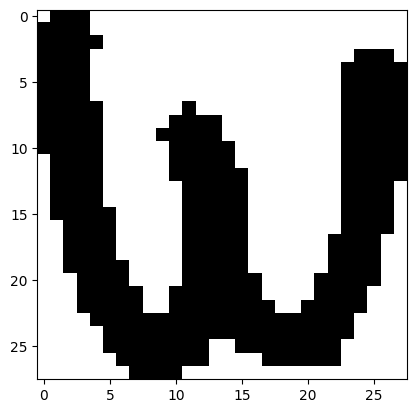

Image de *


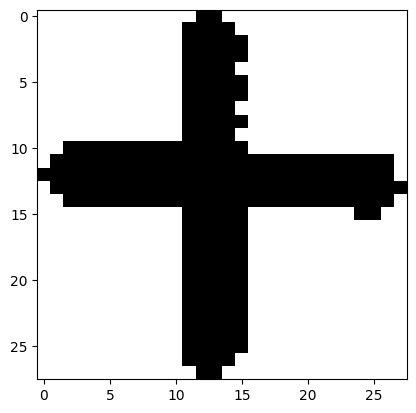

Image de 1


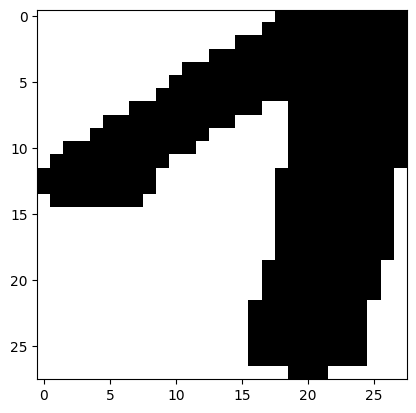

In [182]:
img = Image.open('/Users/mendrika/PycharmProjects/equation/test-9.png')

img_split = split_image(img)
print(len(img_split))

for x in img_split:
    prediction = model.predict(convert_1d(x))
    e_prediction = chr(int(prediction))
    print(f'Image de {e_prediction}')
    plt.imshow(cmap='gray', vmin=0, vmax=255, X=x)
    plt.show()